In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
#import dataset
df = pd.read_csv('diabetes.csv')

# Encode Smoking_history variable
df['smoking_history'] = df['smoking_history'].replace('never', 1)
df['smoking_history'] = df['smoking_history'].replace('not current', 2)
df['smoking_history'] = df['smoking_history'].replace('former', 3)
df['smoking_history'] = df['smoking_history'].replace('current',4)
df['smoking_history'] = df['smoking_history'].replace('ever', 5)
df['smoking_history'] = df['smoking_history'].replace('No Info', 6)

# one-hot encode gender
gender = 'gender'
df[gender] = df[gender].replace('Male', 0)
df[gender] = df[gender].replace('Female', 1)
df[gender] = df[gender].replace('Other', 2)



df.head(10)

/var/folders/nj/kzsyvyz11z19qdb306ljw8_m0000gn/T/ipykernel_88891/2863450033.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoking_history'] = df['smoking_history'].replace('No Info', 6)
/var/folders/nj/kzsyvyz11z19qdb306ljw8_m0000gn/T/ipykernel_88891/2863450033.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[gender] = df[gender].replace('Other', 2)


gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       1  80.0             0              1                1  25.19   
1       1  54.0             0              0                6  27.32   
2       0  28.0             0              0                1  27.32   
3       1  36.0             0              0                4  23.45   
4       0  76.0             1              1                4  20.14   
5       1  20.0             0              0                1  27.32   
6       1  44.0             0              0                1  19.31   
7       1  79.0             0              0                6  23.86   
8       0  42.0             0              0                1  33.64   
9       1  32.0             0              0                1  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
5          6.6                   85         0  
6          6.5                  200         1  
7          5.7                   85         0  
8          4.8                  145         0  
9          5.0                  100         0

In [42]:
from sklearn.model_selection import train_test_split
X = df.drop("diabetes", axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(5, 40),
              
              'criterion': ['gini', 'entropy']}

decision_tree = DecisionTreeClassifier(random_state=42)

grid_search_rf = GridSearchCV(decision_tree, 
                              param_grid=param_grid, 
                              cv=3,
                              scoring='recall',
                              return_train_score=True)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_


{'criterion': 'gini', 'max_depth': 28}

In [45]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=28, random_state=42)
# Train Decision Tree Classifer
dtc.fit(X_train, y_train)
#Predict the response for test dataset
pred = dtc.predict(X_test)
#Evaluation using Classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18282
           1       0.71      0.75      0.73      1718

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000

[[17764   518]
 [  435  1283]]


max_depths: 20
train_accuracies: 20
test_accuracies: 20
train_recalls: 20
test_recalls: 20


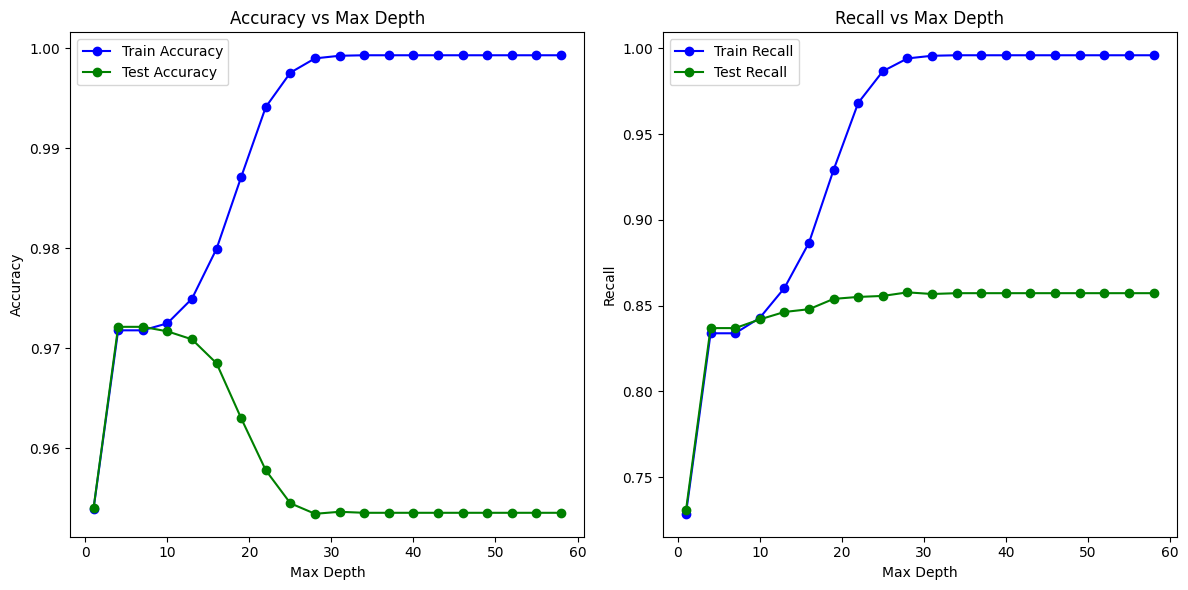

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define range of max_depth
max_depths = range(1, 60, 3)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
train_recalls = []
test_recalls = []

for depth in max_depths:
    # Train the model
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Calculate training and testing accuracy and recall
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    train_recall = recall_score(y_train, train_pred, average='macro')
    test_recall = recall_score(y_test, test_pred, average='macro')
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)

# Print the lengths of the lists to ensure they are the same
print(f'max_depths: {len(max_depths)}')
print(f'train_accuracies: {len(train_accuracies)}')
print(f'test_accuracies: {len(test_accuracies)}')
print(f'train_recalls: {len(train_recalls)}')
print(f'test_recalls: {len(test_recalls)}')

# Plot the results
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(max_depths, train_accuracies, label='Train Accuracy', marker='o', color='blue')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='o', color='green')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()

# Plot training and testing recall
plt.subplot(1, 2, 2)
plt.plot(max_depths, train_recalls, label='Train Recall', marker='o', color='blue')
plt.plot(max_depths, test_recalls, label='Test Recall', marker='o', color='green')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.title('Recall vs Max Depth')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


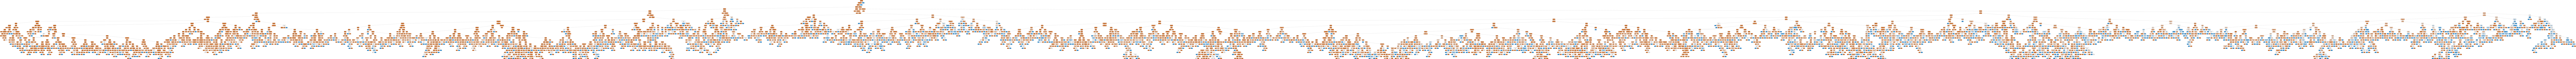

In [46]:
# Tree visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[:-1])

dtc = DecisionTreeClassifier(criterion='gini', max_depth=28, random_state=42)
# Train Decision Tree Classifer
dtc.fit(X_train, y_train)
#Predict the response for test dataset
pred = dtc.predict(X_test)

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=features,
                filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())